# Improving Adaboost through hyperparameter tuning

In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np

In [40]:
np.random.seed(0)

In [41]:
df = pd.read_parquet("data/df.parquet")

In [42]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

In [43]:
ada_reg = AdaBoostRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'loss': ['linear', 'square', 'exponential'],
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ada_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 200}


In [44]:
best_ada_reg = grid_search.best_estimator_
test_score = best_ada_reg.score(X_test, y_test)
print("Test set score with best hyperparameters:", test_score)

Test set score with best hyperparameters: 0.9940008267138086


In [47]:
adab_regressor = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=200)
adab_regressor = adab_regressor.fit(X_train, y_train)

MAE = []
MSE = []
R2 = []

n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = adab_regressor.predict(X_bs)
    # evaluate model
    mae = mean_absolute_error(y_bs, y_hat)
    mse = mean_squared_error(y_bs, y_hat)
    r2 = r2_score(y_bs, y_hat)
    MAE.append(mae)
    MSE.append(mse)
    R2.append(r2)

print('MAE: ' + str(np.mean(MAE)))
print('MSE: ' + str(np.mean(MSE)))
print('R2: ' + str(np.mean(R2)))

MAE: 16401.33633711067
MSE: 428873772.21285105
R2: 0.9949243712005713


In [49]:
y_pred=adab_regressor.predict(X_test)

# Model Evaluation (Metrics)

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mae

16181.942080711437

In [53]:
mse = mean_squared_error(y_test, y_pred)
mse

418272023.62235886

In [54]:
r2 = r2_score(y_test, y_pred)
r2

0.994879686491292

# Graphs (Expected Value vs Actual Data)

In [50]:
import matplotlib.pyplot as plt

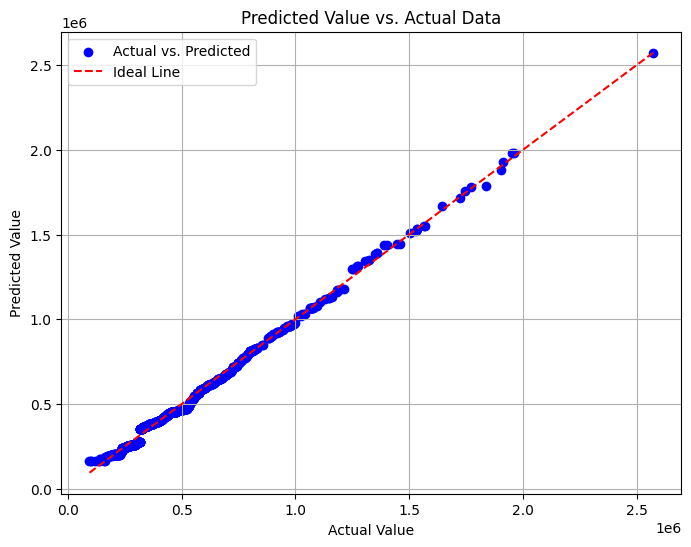

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Predicted Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

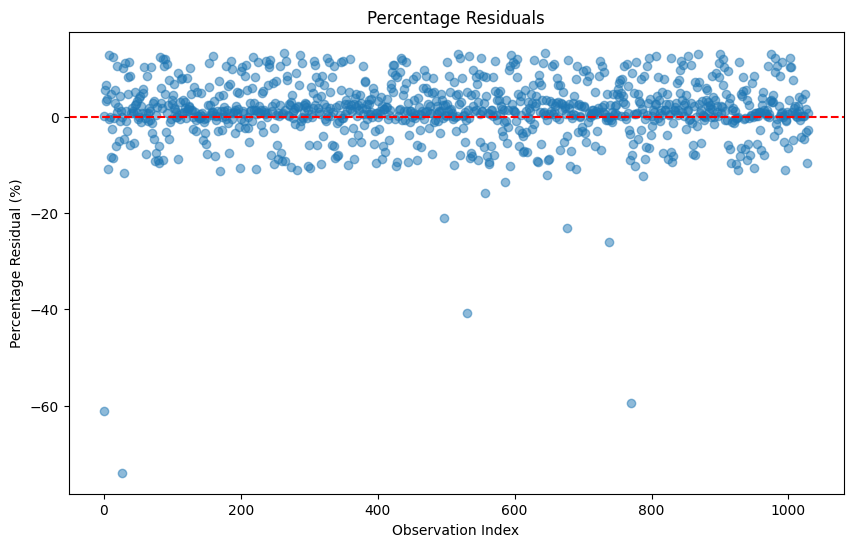

In [55]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()